In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Diffraction computation for a square opening

This is a sample code to compute the diffraction of waves traversing a square aperture. The only change required to make this work for any shaped opening is to adjust the "h(x)" function to produce the correct geometry.


No handles with labels found to put in legend.


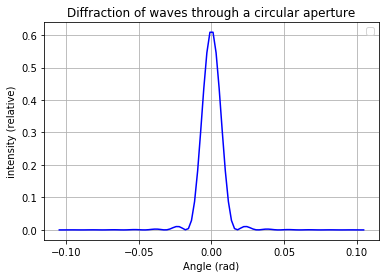

In [6]:
f=4.2e9    # frequency
c=299792458    # speed of light
L=5     # size of aperture
lam=c/f    # wavelength
k=2*pi/lam # wave number
N=1000      # how many strips to divide the aperture into

def h(x,theta):
    """
    return the "height" of a narrow strip of aperture at a distace 'x' from the edge.
    """
    #return L/2-(L/2)*cos(theta)  # for a square aperture the "height" of a slice is always the same
    return 2*sqrt((L/2)**2-(x-(L/2))**2)
def E_amp(x, dx, theta):
    """
    Compute the amplitude of a phaser due to a single strip of the aperture
    propagating in a direction "theta" from the normal
    
    x:      where is the strip relative to the edge.
    theta:  what is the angle of propagation of the wave relative to the normal
    dx:     width of the strip
    """
    
    return (h(x,theta)*dx/(L*L))*exp(1j*k*x*sin(theta))

def E_tot(theta):
    """
    Get the total amplitude at an angle theta
    """
    dx = L/N          # width of a strip
    xs = arange(N)*dx # left edge of each strip
    xmid = xs+dx/2.0  # midpoint of each strip
    
    Esum = 0.0
    for x in xmid:
        Esum += E_amp(x, dx, theta)
        
    return Esum

mags = []
thetas = linspace(-pi/40, pi/40, 100)
for theta in thetas:
    mags.append(abs(E_tot(theta))**2)
    
plot(thetas, mags, 'b-')
title("Diffraction of waves through a circular aperture")
xlabel("Angle (rad)")
ylabel("intensity (relative)")
plt.grid()
plt.legend()
    


In [1]:
24*6

144

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Phasors at theta=0.005')

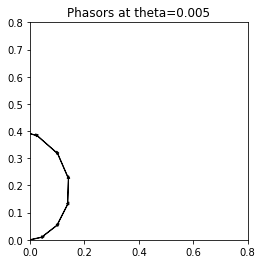

In [5]:

def plotArrow(cLast, c, fc='k', ec='k'):
    arrow(cLast.real, cLast.imag, c.real, c.imag, head_width=0.01, head_length=0.01, fc=fc, ec=ec)
    
def PlotSum(theta, N=10):
    """
    Get the total amplitude at an angle theta
    """
    dx = L/N          # width of a strip
    xs = arange(N)*dx # left edge of each strip
    xmid = xs+dx/2.0  # midpoint of each strip
    
    Esum = 0.0
    for x in xmid:
        E_curr=E_amp(x, dx, theta)
        plotArrow(Esum,E_curr)
        Elast=Esum
        Esum += E_curr
    return Esum

E_total = PlotSum(0.01)
plotArrow(0, E_total, fc='r', ec='r')
xlim(0,0.8)
ylim(0,0.8)
axes().set_aspect('equal')
title('Phasors at theta=0.005')
